#### Problem Description :

* A relatively young bank is growing rapidly in terms of overall customer acquisition. Majority of these are Liability customers with varying sizes of relationship with the bank. The customer base of Asset customers is quite small, and the bank wants to grow this base rapidly to bring in more loan business. 

* Specifically, it want to explore ways of converting its liability customers to Personal Loan customers.

* A campaign the bank ran for liability customers last year showed a healthy conversion rate of over 9% success. This has encouraged the Retail Marketing department to devise smarter campaigns with better target marketing.

#### Anlaytics Objectives :
	
	
* 1)	While designing a new campaign, can we model the previous campaign's customer behavior to 
	analyze what combination of parameters make a customer more likely to 
	accept a personal loan?
	
* 2)	There are several special products / facilities the bank offers like CD and security accounts, 
	online services, credit cards, etc. Can we spot any association among these
	for finding cross-selling opportunities?

#### Data Set Description :

* ID:	Customer ID			
* Age:	Customer's age in completed years			
* Experience:	# of years of professional experience			
* Income:	Annual income of the customer in thousands of Dollars			
* ZIPCode:	Home Address ZIP code.			Do not use ZIP code
* Family:	Family size of the customer			
* CCAvg:	Avg. spending on credit cards per month in thousands of Dollars		
* Education:	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional			
* Mortgage:	Value of house mortgage if any. (thousands of Dollars)			
* **PersonalLoan:	Did this customer accept the personal loan offered in the last campaign?**			
* SecuritiesAccount:	Does the customer have a securities account with the bank?			
* CDAccount:	Does the customer have a certificate of deposit (CD) account with the bank?			
* Online:	Does the customer use internet banking facilities?			
* CreditCard:	Does the customer use a credit card issued by UniversalBank?			

#### Note:
* While reading the data set  replace the '?',',' as NAs

#### Experiment :
* Building a Random Forest to predict whether a person will take a personal loan or not



In [31]:
# Loading required libraries

import os
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [32]:
import warnings
warnings.filterwarnings('ignore')

####  Check the dimensions and type

In [33]:
bank=pd.read_csv("UniversalBank.csv",na_values=["?",","])
print("The number of rows in the bank data set =", )
print("The number of columns in the bank data set =", )

The number of rows in the bank data set = 5000
The number of columns in the bank data set = 14


#### Print column names and check the datatypes of columns

In [34]:
print("The columns in the data set are : \n")


The columns in the data set are : 



['ID',
 'Age',
 'Experience',
 'Income',
 'ZIPCode',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'PersonalLoan',
 'SecuritiesAccount',
 'CDAccount',
 'Online',
 'CreditCard']

In [35]:
print("The datatypes of the columns are :\n ")


The datatypes of the columns are :
 


ID                     int64
Age                  float64
Experience           float64
Income               float64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

#### Check the top 10 rows to glance the dataset 

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25.0,1.0,49.0,91107,4,1.6,1,0,0,1,0,0,0
1,2,45.0,19.0,34.0,90089,3,1.5,1,0,0,1,0,0,0
2,3,39.0,15.0,11.0,94720,1,1.0,1,0,0,0,0,0,0
3,4,35.0,9.0,100.0,94112,1,2.7,2,0,0,0,0,0,0
4,5,35.0,8.0,45.0,91330,4,1.0,2,0,0,0,0,0,1
5,6,37.0,13.0,29.0,92121,4,0.4,2,155,0,0,0,1,0
6,7,53.0,27.0,72.0,91711,2,1.5,2,0,0,0,0,1,0
7,8,50.0,24.0,22.0,93943,1,0.3,3,0,0,0,0,0,1
8,9,35.0,10.0,81.0,90089,3,0.6,2,104,0,0,0,1,0
9,10,NaN,9.0,180.0,93023,1,8.9,3,0,1,0,0,0,0


#### Check the summary of the dataframe

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,4998.000000,4998.000000,4987.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.336335,20.108043,73.807098,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.460241,11.468603,46.037325,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### Check the unique levels in the target attribute Personal Loan and also check for the percentage distribution

In [38]:
print()

0    4520
1     480
Name: PersonalLoan, dtype: int64


#### Check the number of unique ZIP Codes present in the dataset 

In [39]:
print("The number of Unique ZIP Codes in the bank data set is",bank['ZIPCode'].nunique())
print("\n")
print(bank['ZIPCode'].value_counts())

The number of Unique ZIP Codes in the bank data set is 467


94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIPCode, Length: 467, dtype: int64


#### Check the count of  family members in each level

In [40]:
print("The number of family members for each level in the bank data set:\n")
print()

The number of family members for each level in the bank data set:

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


#### Check the count of Education values for each level in the dataset

In [41]:
print("The number of Education levels in the bank data set:\n")
print()

The number of Education levels in the bank data set:

1    2096
3    1501
2    1403
Name: Education, dtype: int64


#### Do Necessary changes for the data types from the previous observations

In [42]:
for cols in ['Education', 'CDAccount', 'Online','CreditCard','SecuritiesAccount','Family','ZIPCode','PersonalLoan']:
    

In [43]:
bank.dtypes

ID                      int64
Age                   float64
Experience            float64
Income                float64
ZIPCode              category
Family               category
CCAvg                 float64
Education            category
Mortgage                int64
PersonalLoan         category
SecuritiesAccount    category
CDAccount            category
Online               category
CreditCard           category
dtype: object

#### Remove the unncessary Columns

In [44]:
bank=bank.drop(["ID","ZIPCode"],axis=1)

In [45]:
bank.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25.0,1.0,49.0,4,1.6,1,0,0,1,0,0,0
1,45.0,19.0,34.0,3,1.5,1,0,0,1,0,0,0
2,39.0,15.0,11.0,1,1.0,1,0,0,0,0,0,0
3,35.0,9.0,100.0,1,2.7,2,0,0,0,0,0,0
4,35.0,8.0,45.0,4,1.0,2,0,0,0,0,0,1


####  Check for missing values 

Age                   2
Experience            2
Income               13
Family                0
CCAvg                 0
Education             0
Mortgage              0
PersonalLoan          0
SecuritiesAccount     0
CDAccount             0
Online                0
CreditCard            0
dtype: int64

#### Split the data into train and test

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
y= bank["PersonalLoan"]
X= 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=123)  

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 11)
(1000, 11)
(4000,)
(1000,)


In [50]:
print(type(X))
print(type(y))

print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


#### Split the attributes into numerical and categorical types

In [51]:
num_attr=X_train.select_dtypes(['int64','float64']).columns
print(num_attr)

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'], dtype='object')

In [52]:
cat_attr =
print(cat_attr)

Index(['Family', 'Education', 'SecuritiesAccount', 'CDAccount', 'Online',
       'CreditCard'],
      dtype='object')

In [53]:
type(X_train)

pandas.core.frame.DataFrame

#### Checking for missing values in train and test dataset

In [54]:
## Check Missing values in train data


Age                   2
Experience            2
Income               11
Family                0
CCAvg                 0
Education             0
Mortgage              0
SecuritiesAccount     0
CDAccount             0
Online                0
CreditCard            0
dtype: int64

In [55]:
## Check Missing values in train data


Age                  0
Experience           0
Income               2
Family               0
CCAvg                0
Education            0
Mortgage             0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

#### Imputing missing values with median

In [56]:
imputer = SimpleImputer(strategy='median')
imputer = imputer.fit(X_train[num_attr])

## Impute on train data

X_train[num_attr] = 
X_test[num_attr] = imputer.transform(X_test[num_attr])

In [57]:
X_train.isnull().sum()

Age                  0
Experience           0
Income               0
Family               0
CCAvg                0
Education            0
Mortgage             0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [58]:
X_test.isnull().sum()

Age                  0
Experience           0
Income               0
Family               0
CCAvg                0
Education            0
Mortgage             0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

#### Standardize the data (numerical attributes only) - Import StandardScaler


In [59]:
scaler = StandardScaler()
scaler.fit(X_train[num_attr])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [60]:
scaler.mean_

array([45.35375 , 20.12525 , 73.86325 ,  1.941265, 57.3785  ])

In [61]:
scaler.var_

array([1.29216111e+02, 1.29351562e+02, 2.11409555e+03, 3.07373640e+00,
       1.06315062e+04])

In [62]:
## Standardize the train data

## Standardize the test data
X_test[num_attr]=scaler.transform(X_test[num_attr])

In [63]:
print(X_train.shape)
print(X_test.shape)

(4000, 11)
(1000, 11)


In [64]:
X_train = pd.get_dummies(columns=cat_attr,data=X_train,drop_first=True)

In [65]:
X_test = pd.get_dummies(columns=cat_attr,data=X_test,drop_first=True)

In [66]:
X_train.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,SecuritiesAccount_1,CDAccount_1,Online_1,CreditCard_1
1863,0.232794,0.164838,-0.671242,-0.422805,0.529744,0,0,0,1,0,0,0,1,0
420,0.144823,0.164838,-0.345009,0.946115,-0.556483,0,0,1,0,1,0,0,1,1
3260,0.848594,0.868241,0.220463,-1.107265,-0.556483,1,0,0,0,1,0,0,0,0
742,-1.174749,-1.241968,0.155217,0.318693,-0.556483,0,0,0,0,0,0,0,1,0
4809,-0.207063,-0.098938,-0.910480,-0.765035,-0.556483,0,1,0,1,0,0,0,0,0


In [67]:
X_test.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,SecuritiesAccount_1,CDAccount_1,Online_1,CreditCard_1
2648,-1.702577,-1.769520,1.764637,2.999494,-0.556483,1,0,0,0,0,0,0,0,0
2456,0.760623,0.868241,-0.758238,-0.650958,-0.556483,1,0,0,0,0,0,0,0,1
4557,-1.086777,-0.978192,-0.953978,-0.536882,-0.556483,1,0,0,1,0,0,0,1,0
4884,1.288452,1.219942,-0.519000,0.147578,-0.556483,0,1,0,0,1,0,0,1,1
92,-0.207063,-0.098938,-0.214515,-0.765035,-0.556483,0,1,0,1,0,0,0,0,0


# Model Building 

#### Let us see the details of the Random Forest in Sklearn 
* class sklearn.ensemble.RandomForestClassifier(n_estimators=’warn’, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)



* A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True 

**Parameters:**

* **n_estimators** : integer, optional (default=10)
    The number of trees in the forest.The default value of n_estimators will change from 10 in version 0.20 to 100 in version 0.22.

* **criterion** : string, optional (default=”gini”)
    The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.

* **max_depth** : integer or None, optional (default=None)
    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

* **min_samples_split** : int, float, optional (default=2)
    The minimum number of samples required to split an internal node:

    If int, then consider min_samples_split as the minimum number.
    If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
    
* **min_samples_leaf** : int, float, optional (default=1) The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

    If int, then consider min_samples_leaf as the minimum number. If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

* **max_features** : int, float, string or None, optional (default=”auto”)
    The number of features to consider when looking for the best split


####  Build Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
clf = RandomForestClassifier(n_estimators=10,max_depth=8)
clf.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

y_pred = clf.predict(X_train)
print("Accuracy for Train set:")
print(accuracy_score(y_train,y_pred))

y_pred_test = clf.predict(X_test)
print("Accuracy for Test set:")
print(accuracy_score(y_test,y_pred_test))

print("\n")

print("Recall for Train set:")
print(recall_score(y_train,y_pred,pos_label=1))

print("Recall for Test set:")
print(recall_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("Precision for Train set:")
print(precision_score(y_train,y_pred,pos_label=1))

print("Precision for Test set:")
print(precision_score(y_test,y_pred_test,pos_label=1))


Accuracy for Train set:
0.989
Accuracy for Test set:
0.981


Recall for Train set:
0.8835978835978836
Recall for Test set:
0.8529411764705882


Precision for Train set:
1.0
Precision for Test set:
0.9560439560439561


In [71]:
clf.feature_importances_

array([0.03002665, 0.0259775 , 0.29551637, 0.21983096, 0.0434952 ,
       0.01339514, 0.03522367, 0.04521649, 0.09165759, 0.107272  ,
       0.00380015, 0.07457307, 0.00704799, 0.00696723])

In [72]:
importances = clf.feature_importances_
indices = np.argsort(importances)
print(indices)

[10 13 12  5  1  0  6  4  7 11  8  9  3  2]


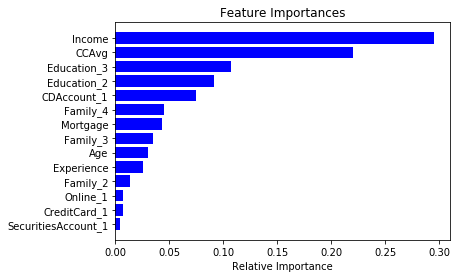

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
features = X_train.columns

plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### GridSearch Cross validation

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [2,3,5,7],
           "min_samples_leaf" : [2, 4]}

scores = ['precision', 'recall']

In [75]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print("\n")

    clf = GridSearchCV(estimator=rfc, param_grid=param_grid,cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on training set:")
    print("\n")
    print(clf.best_params_)
    print("\n")
    
    print("Grid scores on training set:")
    print("\n")
    means = clf.cv_results_['mean_test_score']
    for mean, params in zip(means, clf.cv_results_['params']):
        print("%0.3f for %r"
              % (mean, params))


# Tuning hyper-parameters for precision


Best parameters set found on training set:


{'max_depth': 7, 'min_samples_leaf': 2, 'n_estimators': 54}


Grid scores on training set:


0.753 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 9}
0.955 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 18}
0.956 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 27}
0.954 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 36}
0.854 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 45}
0.854 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 54}
0.954 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 63}
0.955 for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 9}
0.854 for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 18}
0.954 for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 27}
0.955 for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 36}
0.854 for {'max_depth': 2, 'min_samples_leaf': 4, 'n

In [76]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid,cv=5)
CV_rfc.fit(X=X_train, y=y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='

In [77]:
print(CV_rfc.best_score_, CV_rfc.best_params_)

0.97825 {'max_depth': 7, 'min_samples_leaf': 2, 'n_estimators': 63}


In [78]:
y_pred_test=CV_rfc.predict(X_test)
print(accuracy_score(y_test,y_pred_test))

0.982
